# Exploratory Data Analysis (EDA)

## 1. Confidence Intervals

### Let's install "Pandas" library (delete "#-#" if you want to install it)

In [13]:
#-# !pip install pandas

### Now we can import it and read out "Data.csv" file

In [14]:
import pandas as pd

#-# Specify full path to the "Data.csv" file, if your files are not in the same directory  
data = pd.read_csv("Data.csv", delimiter=',')
data

,name,dft_gibbs_free_energy_ev,dft_electronic_energy_ev,dft_entropy_ev,dft_enthalpy_ev,hf_gibbs_free_energy_ev,hf_electronic_energy_ev,hf_entropy_ev,hf_enthalpy_ev
0,dimer_001338,-16917.573481,-16925.578752,1.791468,-16915.782013,-16699.004234,-16708.542262,1.732034,-16697.272200
1,dimer_001340,-15834.675653,-15843.326901,1.798428,-15832.877225,-15625.077800,-15635.403855,1.730149,-15623.347651
2,dimer_001341,-16916.895225,-16924.923731,1.759009,-16915.136217,-16698.972462,-16708.490025,1.728173,-16697.244289
3,dimer_001343,-14897.694694,-14905.933900,1.622494,-14896.072200,-14700.613585,-14710.492825,1.568488,-14699.045097
4,dimer_001346,-14897.734585,-14905.936524,1.662438,-14896.072147,-14700.649672,-14710.478436,1.617040,-14699.032632
...,...,...,...,...,...,...,...,...,...
495,dimer_006866,-21012.703301,-21021.225137,1.712411,-21010.990890,-20749.312102,-20759.341495,1.684781,-20747.627320
496,dimer_006867,-21012.822136,-21021.382126,1.678073,-21011.144062,-20749.476476,-20759.553687,1.651282,-20747.825194
497,dimer_006868,-22968.461459,-22975.705901,1.679857,-22966.781601,-22687.402193,-22695.824857,1.667343,-22685.734851
498,dimer_006888,-21011.089783,-21019.404453,1.841686,-21009.248097,-20745.883071,-20755.660873,1.804790,-20744.078281


### Install "Scipy" library to calculate confidence intervals (delete "#-#" if you want to install it)

In [15]:
#-# !pip install scipy 

### Calculate Confidence Intervals for target values

In [ ]:
import scipy.stats as stats

#-# Calculate confidence intervals for "dft_" columns
dft_columns = [col for col in data.columns if col.startswith("dft_")]

#-# Confidence level for 95%
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

#-# Dictionary to store confidence intervals and their widths
confidence_intervals = {}

#-# Calculate confidence intervals and widths for each 'dft_' column
for col in dft_columns:
    mean = data[col].mean()
    std_error = data[col].std() / (len(data[col]) ** 0.5)
    
    #-# Calculate confidence interval
    margin_error = z_score * std_error
    lower_bound = mean - margin_error
    upper_bound = mean + margin_error
    width = upper_bound - lower_bound
    
    #-# Store results
    confidence_intervals[col] = {
        "mean": mean,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "width": width
    }

#-# Convert to DataFrame for easy viewing
confidence_intervals_df = pd.DataFrame(confidence_intervals).T
confidence_intervals_df

,mean,lower_bound,upper_bound,width
dft_gibbs_free_energy_ev,-18476.120650,-18632.717676,-18319.523624,313.194053
dft_electronic_energy_ev,-18484.279583,-18640.847777,-18327.711390,313.136387
dft_entropy_ev,1.777621,1.771725,1.783516,0.011791
dft_enthalpy_ev,-18474.343029,-18630.938412,-18317.747647,313.190765


### Calculate Confidence Intervals for training features

In [ ]:
#-# Calculate confidence intervals for "hf_" columns
dft_columns = [col for col in data.columns if col.startswith("hf_")]

#-# Confidence level for 95%
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

#-# Dictionary to store confidence intervals and their widths
confidence_intervals = {}

#-# Calculate confidence intervals and widths for each 'hf_' column
for col in dft_columns:
    mean = data[col].mean()
    std_error = data[col].std() / (len(data[col]) ** 0.5)
    
    #-# Calculate confidence interval
    margin_error = z_score * std_error
    lower_bound = mean - margin_error
    upper_bound = mean + margin_error
    width = upper_bound - lower_bound
    
    #-# Store results
    confidence_intervals[col] = {
        "mean": mean,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "width": width
    }

#-# Convert to DataFrame for easy viewing
confidence_intervals_df = pd.DataFrame(confidence_intervals).T
confidence_intervals_df

,mean,lower_bound,upper_bound,width
hf_gibbs_free_energy_ev,-18238.798919,-18393.704638,-18083.893201,309.811437
hf_electronic_energy_ev,-18248.489629,-18403.358525,-18093.620734,309.737792
hf_entropy_ev,1.731084,1.725465,1.736703,0.011238
hf_enthalpy_ev,-18237.067836,-18391.971986,-18082.163685,309.808301


## 2. Distribution Histograms

### Install "Matplotlib" and "Seaborn" libraries to plot the Distribution Histograms (delete """ if you want to install them)

In [18]:
"""
!pip install matplotlib
!pip install seaborn
"""

'\n!pip install matplotlib\n!pip install seaborn\n'

### Distribution Histograms for "dft_" set

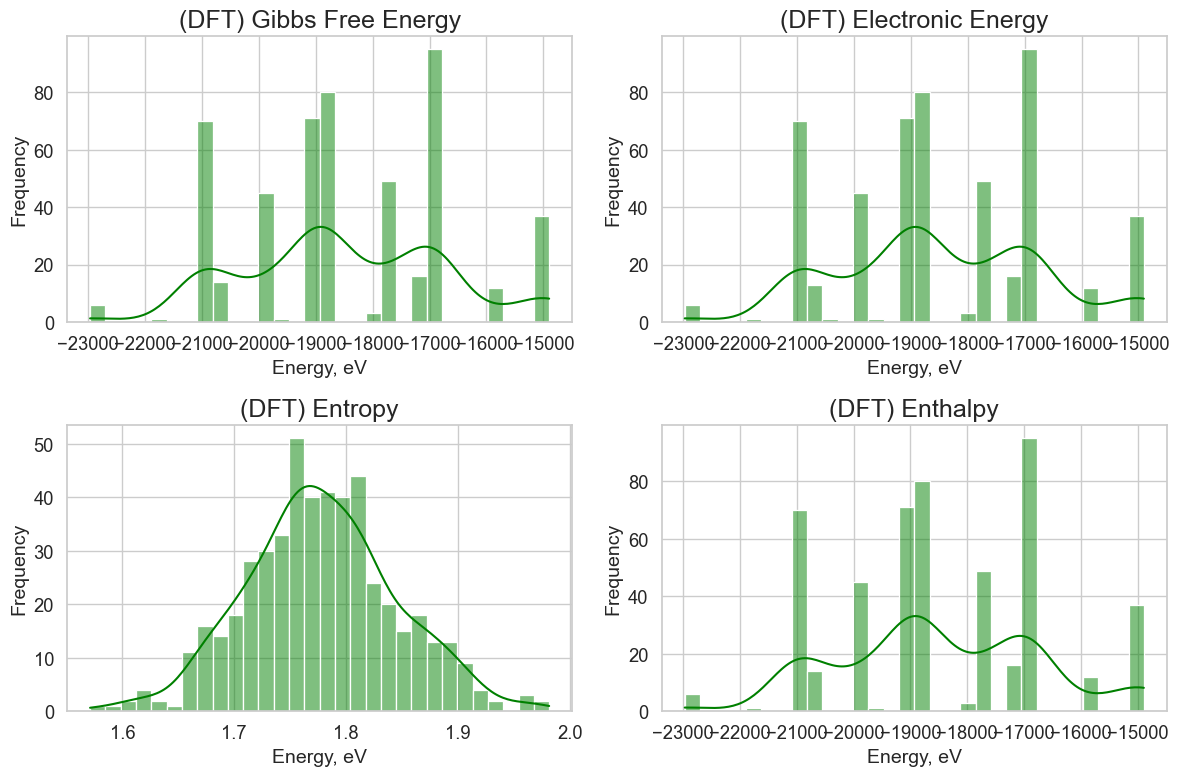

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#-# Define the columns with "dft_" prefix and their corresponding titles
dft_columns = [
    "dft_gibbs_free_energy_ev",
    "dft_electronic_energy_ev",
    "dft_entropy_ev",
    "dft_enthalpy_ev"
]

titles = {
    "dft_gibbs_free_energy_ev": "(DFT) Gibbs Free Energy",
    "dft_electronic_energy_ev": "(DFT) Electronic Energy",
    "dft_entropy_ev": "(DFT) Entropy",
    "dft_enthalpy_ev": "(DFT) Enthalpy"
}

#-# Set up the plotting area with a grid for subplots
plt.figure(figsize=(12, 8))
num_columns = len(dft_columns)
rows = (num_columns // 2) + (num_columns % 2)

#-# Plot each 'dft_' column in a subplot with customized titles and colors
for i, col in enumerate(dft_columns, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(data[col], kde=True, bins=30, color="green") 
    plt.title(titles[col], fontsize=18)
    plt.xlabel("Energy, eV", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()
plt.show()

### Distribution Histograms for "hf_" set

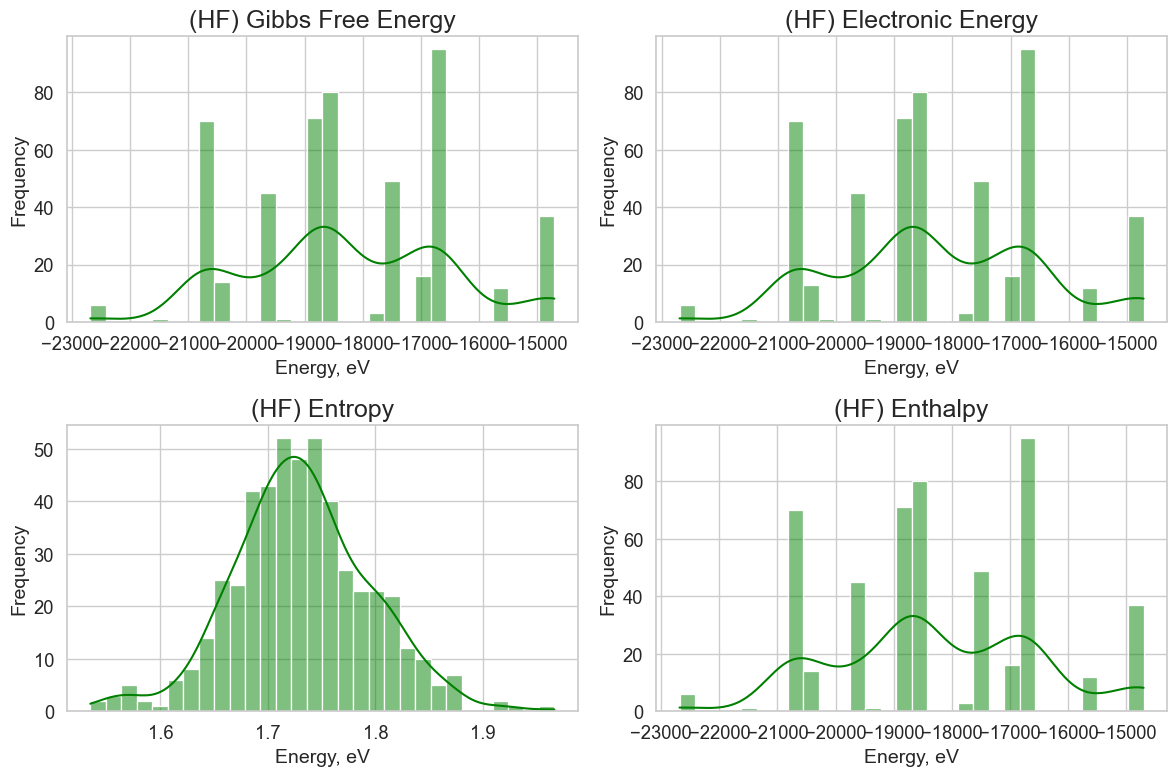

In [20]:
#-# Define the columns with "hf_" prefix and their corresponding titles
dft_columns = [
    "hf_gibbs_free_energy_ev",
    "hf_electronic_energy_ev",
    "hf_entropy_ev",
    "hf_enthalpy_ev"
]

titles = {
    "hf_gibbs_free_energy_ev": "(HF) Gibbs Free Energy",
    "hf_electronic_energy_ev": "(HF) Electronic Energy",
    "hf_entropy_ev": "(HF) Entropy",
    "hf_enthalpy_ev": "(HF) Enthalpy"
}

#-# Set up the plotting area with a grid for subplots
plt.figure(figsize=(12, 8))
num_columns = len(dft_columns)
rows = (num_columns // 2) + (num_columns % 2)

#-# Plot each 'hf_' column in a subplot with customized titles and colors
for i, col in enumerate(dft_columns, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(data[col], kde=True, bins=30, color="green") 
    plt.title(titles[col], fontsize=18)  
    plt.xlabel("Energy, eV", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()
plt.show()

## 3. Correlation Matrix

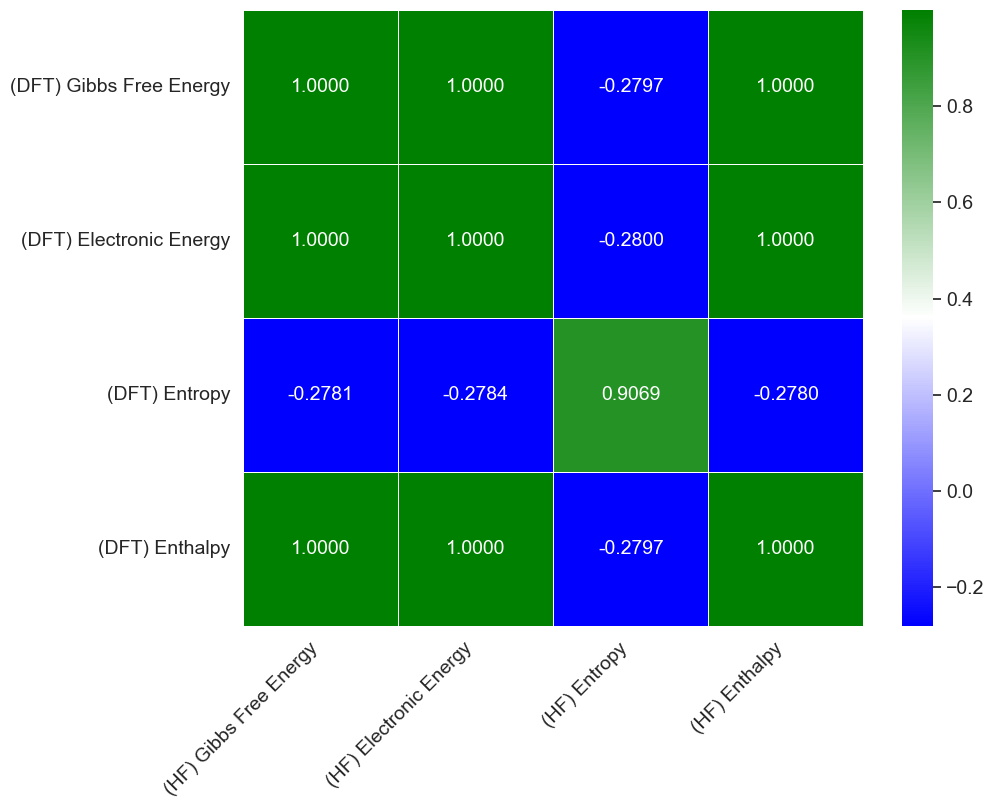

In [21]:
from matplotlib.colors import LinearSegmentedColormap

#-# Select "dft_" and "hf_" columns separately
dft_columns = [col for col in data.columns if col.startswith("dft_")]
hf_columns = [col for col in data.columns if col.startswith("hf_")]

#-# Calculate the correlation matrix for all "dft_" and "hf_" columns
correlation_matrix = data[dft_columns + hf_columns].corr()

#-# Subset the correlation matrix to have "dft_" on the Y-axis and "hf_" on the X-axis
correlation_matrix = correlation_matrix.loc[dft_columns, hf_columns]

#-# Define new labels for the DFT and HF columns
dft_labels = {
    "dft_gibbs_free_energy_ev": "(DFT) Gibbs Free Energy",
    "dft_electronic_energy_ev": "(DFT) Electronic Energy",
    "dft_entropy_ev": "(DFT) Entropy",
    "dft_enthalpy_ev": "(DFT) Enthalpy"
}

hf_labels = {
    "hf_gibbs_free_energy_ev": "(HF) Gibbs Free Energy",
    "hf_electronic_energy_ev": "(HF) Electronic Energy",
    "hf_entropy_ev": "(HF) Entropy",
    "hf_enthalpy_ev": "(HF) Enthalpy"
}

#-# Rename the rows and columns of the correlation matrix
correlation_matrix.rename(index=dft_labels, columns=hf_labels, inplace=True)

colors = ["blue", "white", "green"]
custom_blue_green = LinearSegmentedColormap.from_list("CustomBlueGreen", colors)

#-# Plot the renamed correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=custom_blue_green, fmt=".4f", linewidths=0.5,
                       annot_kws={"size": 14}, cbar=True)

#-# Rotate X-axis labels to be diagonal and set font size
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

#-# Customize the color bar font size after plotting
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=14) 

plt.show()

# 4. Statistical Significance (P-values)

In [ ]:
from scipy.stats import pearsonr

#-# Select "dft_" and "hf_" columns separately
dft_columns = [col for col in data.columns if col.startswith("dft_")]
hf_columns = [col for col in data.columns if col.startswith("hf_")]

#-# Initialize an empty DataFrame to store p-values
p_values = pd.DataFrame(index=dft_columns, columns=hf_columns)

#-# Calculate p-values for each pair of "dft_" and "hf_" columns
for hf in hf_columns:
    for dft in dft_columns:
        _, p_value = pearsonr(data[hf], data[dft])
        p_values.loc[dft, hf] = p_value

p_values

,hf_gibbs_free_energy_ev,hf_electronic_energy_ev,hf_entropy_ev,hf_enthalpy_ev
dft_gibbs_free_energy_ev,0.0,0.0,0.0,0.0
dft_electronic_energy_ev,0.0,0.0,0.0,0.0
dft_entropy_ev,0.0,0.0,0.0,0.0
dft_enthalpy_ev,0.0,0.0,0.0,0.0


# 5. Box-and-Whiskers diagrams

### Diagrams for target values

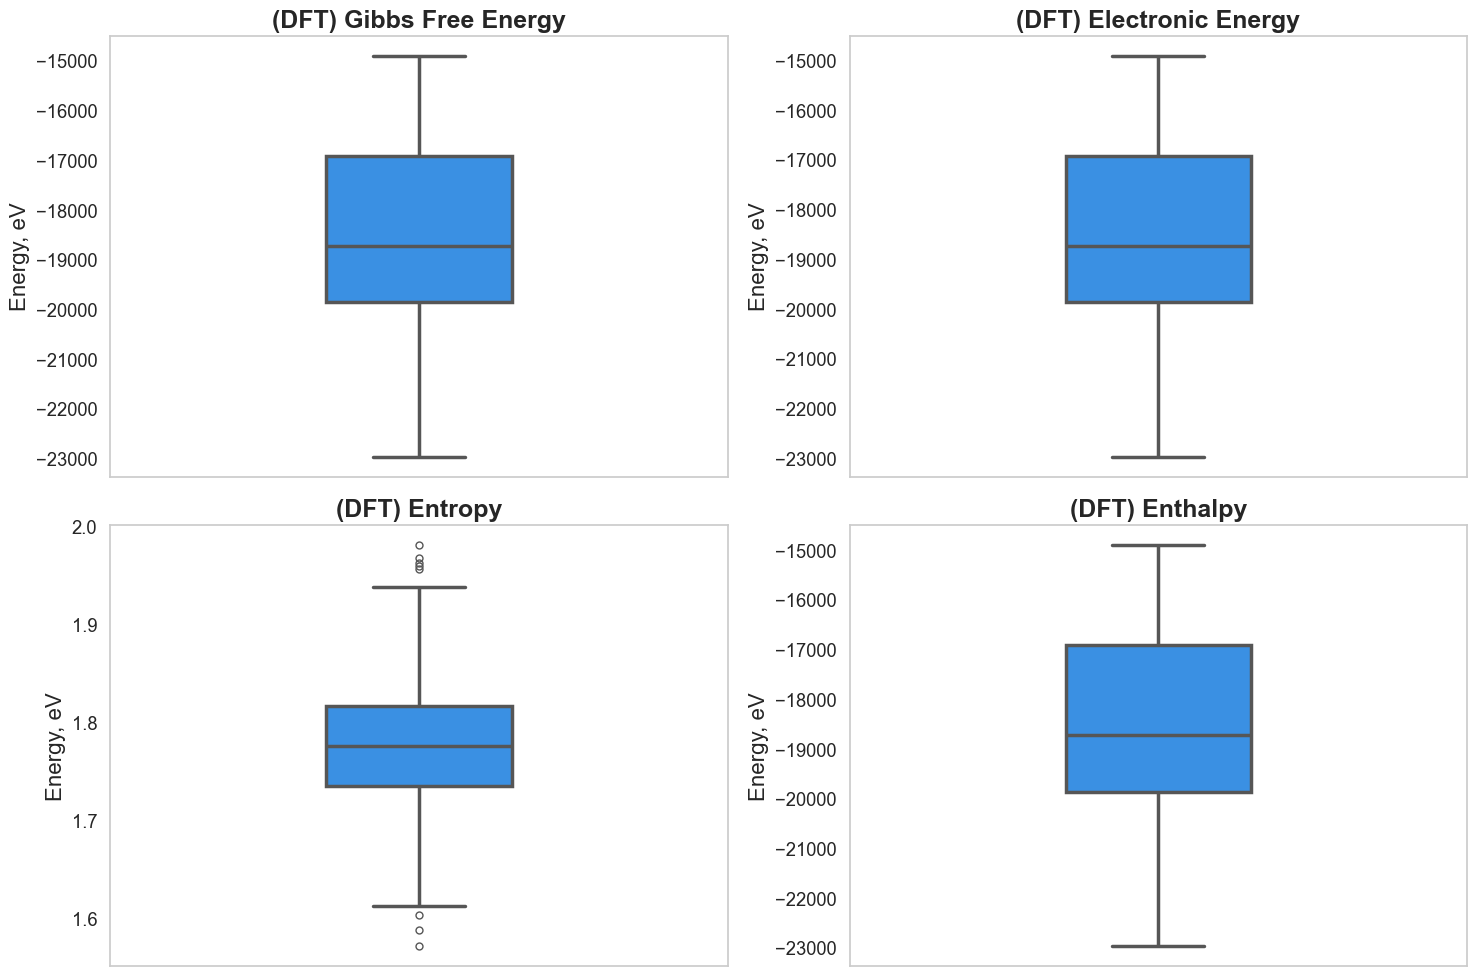

In [23]:
import math

#-# Select "dft_" columns to plot
dft_columns = [col for col in data.columns if col.startswith("dft_")]

#-# Define custom titles for the DFT columns
dft_labels = {
    "dft_gibbs_free_energy_ev": "(DFT) Gibbs Free Energy",
    "dft_electronic_energy_ev": "(DFT) Electronic Energy",
    "dft_entropy_ev": "(DFT) Entropy",
    "dft_enthalpy_ev": "(DFT) Enthalpy"
}

#-# Calculate the number of rows needed for 2 plots per row
n_rows = math.ceil(len(dft_columns) / 2)

#-# Set the theme for the plot
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize=(15, n_rows * 5)) 

#-# Plot each "dft_" column separately in a 2-column grid
for i, col in enumerate(dft_columns):
    plt.subplot(n_rows, 2, i + 1)
    sns.boxplot(
        y=data[col],
        color='dodgerblue',
        linewidth=2.5,  
        width=0.3,      
        flierprops=dict(marker='o', color='red', markersize=5)
    )
    
    #-# Set custom title from dft_labels
    plt.title(dft_labels.get(col, col), fontsize=18, fontweight='bold')
    plt.ylabel("Energy, eV", fontsize=16)
    plt.grid(False)

#-# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Diagrams for training set

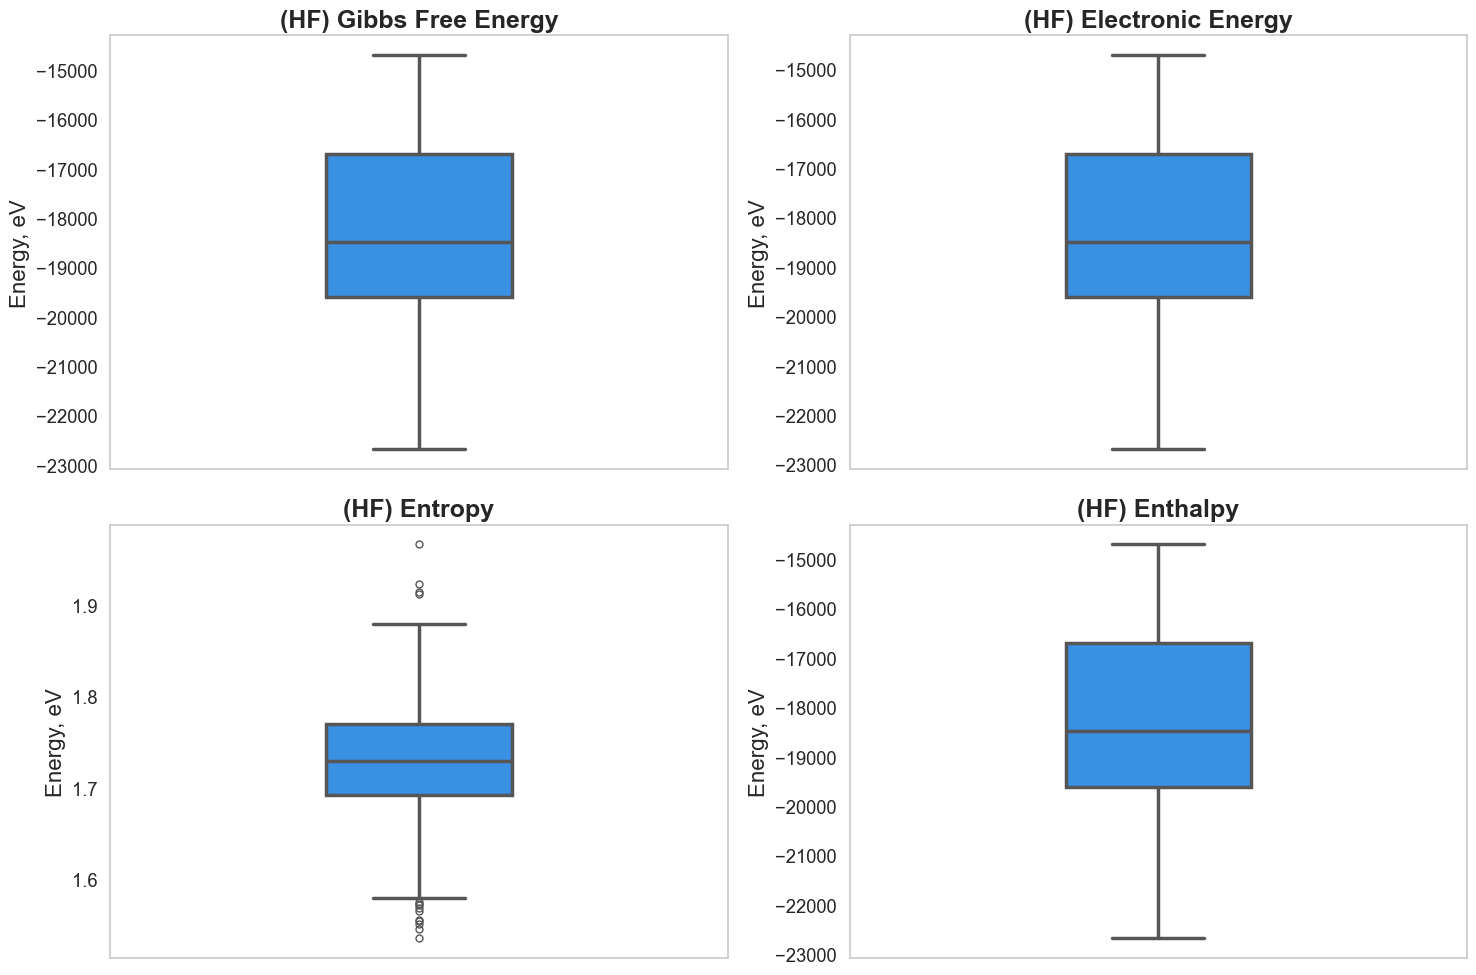

In [24]:
#-# Select "hf_" columns to plot
dft_columns = [col for col in data.columns if col.startswith("hf_")]

#-# Define custom titles for the HF columns
dft_labels = {
    "hf_gibbs_free_energy_ev": "(HF) Gibbs Free Energy",
    "hf_electronic_energy_ev": "(HF) Electronic Energy",
    "hf_entropy_ev": "(HF) Entropy",
    "hf_enthalpy_ev": "(HF) Enthalpy"
}

#-# Calculate the number of rows needed for 2 plots per row
n_rows = math.ceil(len(dft_columns) / 2)

#-# Set the theme for the plot
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize=(15, n_rows * 5)) 

#-# Plot each "hf_" column separately in a 2-column grid
for i, col in enumerate(dft_columns):
    plt.subplot(n_rows, 2, i + 1)
    sns.boxplot(
        y=data[col],
        color='dodgerblue',
        linewidth=2.5,  
        width=0.3,      
        flierprops=dict(marker='o', color='red', markersize=5)
    )
    
    #-# Set custom title from dft_labels
    plt.title(dft_labels.get(col, col), fontsize=18, fontweight='bold')
    plt.ylabel("Energy, eV", fontsize=16)
    plt.grid(False)

#-# Adjust layout for better spacing
plt.tight_layout()
plt.show()